# Comparative Analysis
In this notebook, we compare ChangeFinder with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
thresholds = list(range(10,100+1,10))
methods = list()

for t in thresholds:
    candidate_name = f"{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/change_finder_threshold/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,10-threshold,20-threshold,30-threshold,40-threshold,50-threshold,60-threshold,70-threshold,80-threshold,90-threshold,100-threshold
0,DodgerLoopDay,0.372,0.626,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,EEGRat,0.842,0.771,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
2,EEGRat2,0.449,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.424,0.580,0.648,0.481,0.481,0.281,0.281,0.281,0.281,0.281
4,GrandMalSeizures2,0.574,0.469,0.508,0.508,0.508,0.508,0.508,0.508,0.508,0.508
5,GreatBarbet1,0.853,0.722,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.425,0.610,0.634,0.633,0.615,0.358,0.358,0.358,0.358,0.358
8,InsectEPG1,0.314,0.504,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.295,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_25221/2219294936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.mean(axis=0).round(3)


10-threshold     0.465
20-threshold     0.472
30-threshold     0.499
40-threshold     0.516
50-threshold     0.513
60-threshold     0.480
70-threshold     0.462
80-threshold     0.462
90-threshold     0.462
100-threshold    0.462
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_25221/1084607075.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_scores.std(axis=0).round(3)


10-threshold     0.247
20-threshold     0.245
30-threshold     0.253
40-threshold     0.244
50-threshold     0.234
60-threshold     0.251
70-threshold     0.241
80-threshold     0.241
90-threshold     0.241
100-threshold    0.241
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_25221/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

10-threshold:wins=9 rank=5.28571
20-threshold:wins=5 rank=4.2381
30-threshold:wins=9 rank=2.57143
40-threshold:wins=6 rank=2.28571
50-threshold:wins=6 rank=2.09524
60-threshold:wins=7 rank=2.38095
70-threshold:wins=5 rank=2.61905
80-threshold:wins=5 rank=2.61905
90-threshold:wins=5 rank=2.61905
100-threshold:wins=5 rank=2.61905


Let's plot and output the ranks.

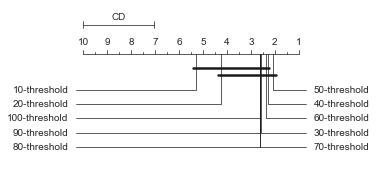

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=5, filename="../../figures/cd_ablation_change_finder_threshold.pdf")

Let's compute wins/losses against ClaSP.

In [12]:
selection = "50-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

50-threshold vs 10-threshold: (wins/ties/losses): 11/1/9
50-threshold vs 20-threshold: (wins/ties/losses): 8/7/6
50-threshold vs 30-threshold: (wins/ties/losses): 3/14/4
50-threshold vs 40-threshold: (wins/ties/losses): 2/16/3
50-threshold vs 60-threshold: (wins/ties/losses): 3/17/1
50-threshold vs 70-threshold: (wins/ties/losses): 5/16/0
50-threshold vs 80-threshold: (wins/ties/losses): 5/16/0
50-threshold vs 90-threshold: (wins/ties/losses): 5/16/0
50-threshold vs 100-threshold: (wins/ties/losses): 5/16/0


In [ ]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig("../../figures/bp_ablation_change_finder_threshold.pdf", bbox_inches="tight") 